# **Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
# reading csv file from url 
sheet_url = 'https://docs.google.com/spreadsheets/d/1s2nJjYsKS7uSHLRLis8acakiODMFOpIfKSdxsD_CP_s/edit#gid=1642247527'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df0 = pd.read_csv(sheet_url_trf)
df0

,user_id,date,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province
0,10035,2018-05-24,1160628,2196007,3164879,240,1,electronics,Jaksel,DKI Jakarta
1,10053,2018-07-22,1100650,2193080,3140309,232,10,games,Jaksel,DKI Jakarta
2,10032,2018-10-22,1118238,2142522,3151159,134,17,home and apartment,Jakpus,DKI Jakarta
3,10069,2018-04-13,1182897,2155246,3172989,146,9,sports,Jaksel,DKI Jakarta
4,10025,2018-05-02,1148545,2131938,3174162,105,16,clothing,Tangsel,Banten
...,...,...,...,...,...,...,...,...,...,...
8972,11019,2018-01-14,4157499,5130378,6114690,33,6,home and apartment,Jakpus,DKI Jakarta
8973,10912,2018-12-01,4106230,5134521,6120370,38,27,sports,Jaksel,DKI Jakarta
8974,10960,2018-10-16,4146922,5108166,6114767,55,21,sports,surabaya,Jawa Timur
8975,10619,2018-09-23,4187553,5104547,6102348,55,2,home and apartment,surabaya,Jawa Timur


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8977 entries, 0 to 8976
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  8977 non-null   int64 
 1   date                     8977 non-null   object
 2   transaction_id           8977 non-null   int64 
 3   visit_id                 8977 non-null   int64 
 4   voucher_id               8977 non-null   int64 
 5   transaction_amount_in_k  8977 non-null   int64 
 6   voucher_amount_in_k      8977 non-null   int64 
 7   product_category         8977 non-null   object
 8   city                     8977 non-null   object
 9   province                 8977 non-null   object
dtypes: int64(6), object(4)
memory usage: 701.5+ KB


In [ ]:
pd.isnull(df0).sum()

user_id                    0
date                       0
transaction_id             0
visit_id                   0
voucher_id                 0
transaction_amount_in_k    0
voucher_amount_in_k        0
product_category           0
city                       0
province                   0
dtype: int64

# **Cleaning Task**

## **Handling Missing Data & String Manipulation**

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
#recheck product_category unique
df = df0.copy()
sorted(df['product_category'].unique())

['clothing',
 'electronics',
 'games',
 'groceries',
 'home and apartment',
 'shoes',
 'sports',
 'stationary']

In [ ]:
#check city unique
sorted(df["city"].unique())

['Bandung',
 'Depok',
 'Jakarta Barat',
 'Jakarta Pusat',
 'Jakarta Selatan',
 'Jakarta Timur',
 'Jakarta Utara',
 'Jakbar',
 'Jakpus',
 'Jaksel',
 'Kota Bekasi',
 'Kota Bogor',
 'Kota Depok',
 'Kota Tangerang',
 'Semarang',
 'Surabaya',
 'Tangerang Selatan',
 'Tangsel',
 'surabaya']

In [ ]:
# to replace certain words on 'city' column
df['city'] = df['city'].str.replace('Jakbar', 'Jakarta Barat').replace('Jakpus', 'Jakarta Pusat').replace('Jaksel', 'Jakarta Selatan').replace('Tangsel', 'Tangerang Selatan').replace('Kota Bekasi', 'Bekasi').replace('Kota Bogor', 'Bogor').replace('Kota Depok', 'Depok').replace('Kota Tangerang', 'Tangerang').replace('surabaya','Surabaya')

In [ ]:
#recheck "city" unique
sorted(df["city"].unique())

['Bandung',
 'Bekasi',
 'Bogor',
 'Depok',
 'Jakarta Barat',
 'Jakarta Pusat',
 'Jakarta Selatan',
 'Jakarta Timur',
 'Jakarta Utara',
 'Semarang',
 'Surabaya',
 'Tangerang',
 'Tangerang Selatan']

In [ ]:
#check 'province' unique
sorted(df['province'].unique())

['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur']

In [ ]:
#check for duplicates
df[df.duplicated()]

,user_id,date,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province


## **Handling Outliers**

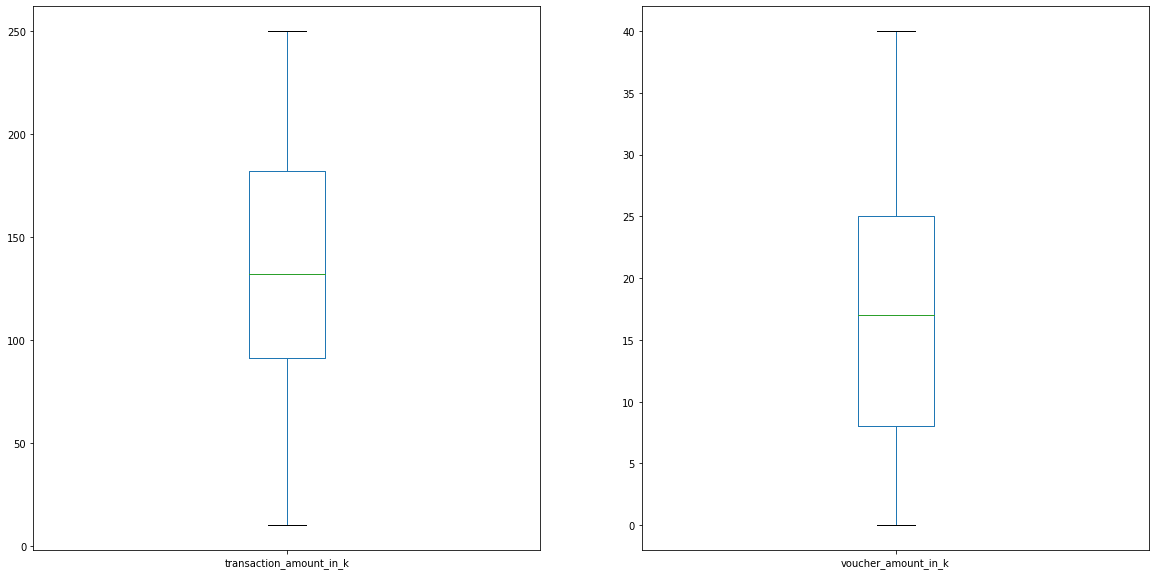

In [ ]:
numerical_column = ['transaction_amount_in_k','voucher_amount_in_k']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
df.describe()

,user_id,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k
count,8977.000000,8.977000e+03,8.977000e+03,8.977000e+03,8977.000000,8977.000000
mean,10240.090119,1.950859e+06,2.950838e+06,3.950321e+06,135.100702,16.584716
std,335.024947,1.018784e+06,1.018914e+06,1.019020e+06,60.172206,9.873621
min,10000.000000,1.100003e+06,2.100107e+06,3.100011e+06,10.000000,0.000000
25%,10034.000000,1.173674e+06,2.172494e+06,3.170290e+06,91.000000,8.000000
50%,10068.000000,1.272213e+06,2.274056e+06,3.272561e+06,132.000000,17.000000
75%,10337.000000,2.187436e+06,3.187238e+06,4.187107e+06,182.000000,25.000000
max,11499.000000,4.199904e+06,5.199986e+06,6.199993e+06,250.000000,40.000000


# **RFM Segmentation Only**

## **RFM using 'visit_id_first' version**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8977 entries, 0 to 8976
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  8977 non-null   int64 
 1   date                     8977 non-null   object
 2   transaction_id           8977 non-null   int64 
 3   visit_id                 8977 non-null   int64 
 4   voucher_id               8977 non-null   int64 
 5   transaction_amount_in_k  8977 non-null   int64 
 6   voucher_amount_in_k      8977 non-null   int64 
 7   product_category         8977 non-null   object
 8   city                     8977 non-null   object
 9   province                 8977 non-null   object
dtypes: int64(6), object(4)
memory usage: 701.5+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_recency2 = df.groupby(by='user_id',
                        as_index=False)['date'].max()
df_recency2.columns = ['user_id','date']
recent_date = df_recency2['date'].max()
df_recency2['Recency'] = df_recency2['date'].apply(
    lambda x: (recent_date - x).days)
df_recency2

,user_id,date,Recency
0,10000,2018-12-22,6
1,10001,2018-12-26,2
2,10002,2018-12-24,4
3,10003,2018-12-16,12
4,10004,2018-12-25,3
...,...,...,...
1175,11492,2018-05-28,214
1176,11494,2018-08-15,135
1177,11495,2018-08-23,127
1178,11497,2018-01-10,352


In [ ]:
df_recency2.describe()

,user_id,Recency
count,1180.000000,1180.000000
mean,10673.597458,100.447458
std,437.802348,96.432593
min,10000.000000,0.000000
25%,10295.750000,21.000000
50%,10599.500000,68.000000
75%,11052.000000,162.000000
max,11499.000000,361.000000


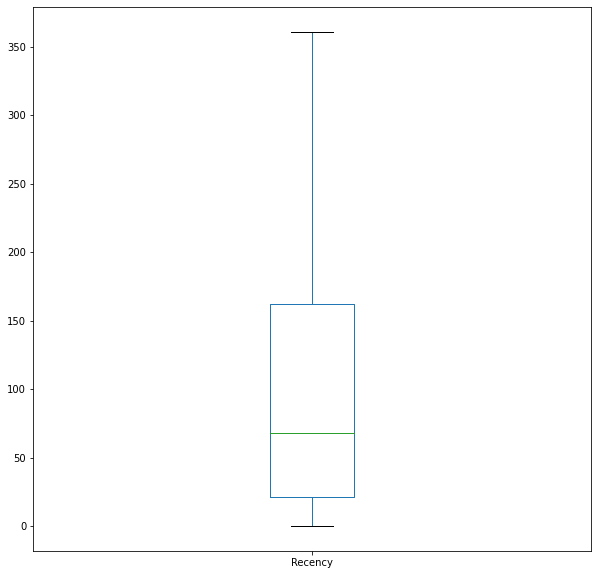

In [ ]:
df_recency2.boxplot(column='Recency', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
recency_copy = df_recency2.copy()
recency_copy

,user_id,date,Recency
0,10000,2018-12-22,6
1,10001,2018-12-26,2
2,10002,2018-12-24,4
3,10003,2018-12-16,12
4,10004,2018-12-25,3
...,...,...,...
1175,11492,2018-05-28,214
1176,11494,2018-08-15,135
1177,11495,2018-08-23,127
1178,11497,2018-01-10,352


In [ ]:
df_copy = df.copy()
df_copy

,user_id,date,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province
0,10035,2018-05-24,1160628,2196007,3164879,240,1,electronics,Jakarta Selatan,DKI Jakarta
1,10053,2018-07-22,1100650,2193080,3140309,232,10,games,Jakarta Selatan,DKI Jakarta
2,10032,2018-10-22,1118238,2142522,3151159,134,17,home and apartment,Jakarta Pusat,DKI Jakarta
3,10069,2018-04-13,1182897,2155246,3172989,146,9,sports,Jakarta Selatan,DKI Jakarta
4,10025,2018-05-02,1148545,2131938,3174162,105,16,clothing,Tangerang Selatan,Banten
...,...,...,...,...,...,...,...,...,...,...
8972,11019,2018-01-14,4157499,5130378,6114690,33,6,home and apartment,Jakarta Pusat,DKI Jakarta
8973,10912,2018-12-01,4106230,5134521,6120370,38,27,sports,Jakarta Selatan,DKI Jakarta
8974,10960,2018-10-16,4146922,5108166,6114767,55,21,sports,Surabaya,Jawa Timur
8975,10619,2018-09-23,4187553,5104547,6102348,55,2,home and apartment,Surabaya,Jawa Timur


In [ ]:
df_copysort = df_copy.sort_values(
...     by=["user_id","date"],
...     ascending=True)
df_copysort.head()

,user_id,date,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province
1998,10000,2018-01-01,1140582,2110379,3126808,198,10,games,Bogor,Jawa Barat
4852,10000,2018-01-12,1226920,2291514,3297924,210,15,sports,Bekasi,Jawa Barat
1133,10000,2018-01-14,1189599,2133588,3179344,226,3,stationary,Jakarta Timur,DKI Jakarta
2687,10000,2018-01-18,1155524,2174128,3123869,207,25,sports,Semarang,Jawa Tengah
951,10000,2018-01-24,1160216,2194313,3178554,112,22,electronics,Jakarta Barat,DKI Jakarta


In [ ]:
df_copysort['date_before'] = df_copysort.groupby(['user_id'])['date'].shift(1)
df_copysort.head()

,user_id,date,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province,date_before
1998,10000,2018-01-01,1140582,2110379,3126808,198,10,games,Bogor,Jawa Barat,NaT
4852,10000,2018-01-12,1226920,2291514,3297924,210,15,sports,Bekasi,Jawa Barat,2018-01-01
1133,10000,2018-01-14,1189599,2133588,3179344,226,3,stationary,Jakarta Timur,DKI Jakarta,2018-01-12
2687,10000,2018-01-18,1155524,2174128,3123869,207,25,sports,Semarang,Jawa Tengah,2018-01-14
951,10000,2018-01-24,1160216,2194313,3178554,112,22,electronics,Jakarta Barat,DKI Jakarta,2018-01-18


In [ ]:
df_copysort['recency'] = df_copysort['date'] - df_copysort['date_before']
df_copysort['recency2'] = df_copysort['date'].max() - df_copysort['date_before'].max()
df_copysort

,user_id,date,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province,date_before,recency,recency2
1998,10000,2018-01-01,1140582,2110379,3126808,198,10,games,Bogor,Jawa Barat,NaT,NaT,0 days
4852,10000,2018-01-12,1226920,2291514,3297924,210,15,sports,Bekasi,Jawa Barat,2018-01-01,11 days,0 days
1133,10000,2018-01-14,1189599,2133588,3179344,226,3,stationary,Jakarta Timur,DKI Jakarta,2018-01-12,2 days,0 days
2687,10000,2018-01-18,1155524,2174128,3123869,207,25,sports,Semarang,Jawa Tengah,2018-01-14,4 days,0 days
951,10000,2018-01-24,1160216,2194313,3178554,112,22,electronics,Jakarta Barat,DKI Jakarta,2018-01-18,6 days,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,11494,2018-08-15,4115684,5142167,6106286,51,20,clothing,Jakarta Barat,DKI Jakarta,NaT,NaT,0 days
8646,11495,2018-02-22,4165724,5185038,6108128,63,13,groceries,Depok,Jawa Barat,NaT,NaT,0 days
8263,11495,2018-08-23,4107896,5139681,6182806,31,15,groceries,Jakarta Utara,DKI Jakarta,2018-02-22,182 days,0 days
8733,11497,2018-01-10,4140418,5114552,6171030,44,23,electronics,Jakarta Barat,DKI Jakarta,NaT,NaT,0 days


In [ ]:
df_copysort['date'].max()

Timestamp('2018-12-28 00:00:00')

In [ ]:
# df_recency['Recency'] = df_recency['max_date'].apply(lambda row: (reference_date - row).days)
# df_recency.drop('max_date',inplace=True,axis=1)
# df_recency[['CustomerKey','Recency']].head()

In [ ]:
df_copysort2 = df_copysort.groupby(['user_id'])[['date']].max()
df_copysort2

,date
user_id,
10000,2018-12-22
10001,2018-12-26
10002,2018-12-24
10003,2018-12-16
10004,2018-12-25
...,...
11492,2018-05-28
11494,2018-08-15
11495,2018-08-23


In [ ]:

df_copysort2['date_before'] = df_copysort.groupby(['user_id'])[['date_before']].max()
df_copysort2

,date,date_before
user_id,,
10000,2018-12-22,2018-12-20
10001,2018-12-26,2018-12-19
10002,2018-12-24,2018-12-23
10003,2018-12-16,2018-12-08
10004,2018-12-25,2018-12-24
...,...,...
11492,2018-05-28,2018-04-24
11494,2018-08-15,NaT
11495,2018-08-23,2018-02-22


In [ ]:
df_copysort2['recency2'] = df_copysort2['date'] - df_copysort2['date_before']
df_copysort2

,date,date_before,recency2
user_id,,,
10000,2018-12-22,2018-12-20,2 days
10001,2018-12-26,2018-12-19,7 days
10002,2018-12-24,2018-12-23,1 days
10003,2018-12-16,2018-12-08,8 days
10004,2018-12-25,2018-12-24,1 days
...,...,...,...
11492,2018-05-28,2018-04-24,34 days
11494,2018-08-15,NaT,NaT
11495,2018-08-23,2018-02-22,182 days


In [ ]:
df_copysort2['recency2'].fillna('0 days')
df_copysort2

,date,date_before,recency2
user_id,,,
10000,2018-12-22,2018-12-20,2 days
10001,2018-12-26,2018-12-19,7 days
10002,2018-12-24,2018-12-23,1 days
10003,2018-12-16,2018-12-08,8 days
10004,2018-12-25,2018-12-24,1 days
...,...,...,...
11492,2018-05-28,2018-04-24,34 days
11494,2018-08-15,NaT,NaT
11495,2018-08-23,2018-02-22,182 days


In [ ]:
# df_copysort2['recency2'] = pd.to_numeric(df_copysort2['recency2'].dt.days, downcast='integer')
df_copysort2['recency2'] = pd.to_numeric(df_copysort2['recency2'], errors='coerce').fillna(0).astype('int64')
df_copysort2

,date,date_before,recency2
user_id,,,
10000,2018-12-22,2018-12-20,172800000000000
10001,2018-12-26,2018-12-19,604800000000000
10002,2018-12-24,2018-12-23,86400000000000
10003,2018-12-16,2018-12-08,691200000000000
10004,2018-12-25,2018-12-24,86400000000000
...,...,...,...
11492,2018-05-28,2018-04-24,2937600000000000
11494,2018-08-15,NaT,-9223372036854775808
11495,2018-08-23,2018-02-22,15724800000000000


In [ ]:
df_copysort2.describe()

,recency2
count,1.180000e+03
mean,-2.520096e+18
std,4.117014e+18
min,-9.223372e+18
25%,-9.223372e+18
50%,1.987200e+15
75%,7.084800e+15
max,3.110400e+16


In [ ]:
# df_copysort2.boxplot(column='recency2', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
df_copysort2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 10000 to 11499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1180 non-null   datetime64[ns]
 1   date_before  857 non-null    datetime64[ns]
 2   recency2     1180 non-null   int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 36.9 KB


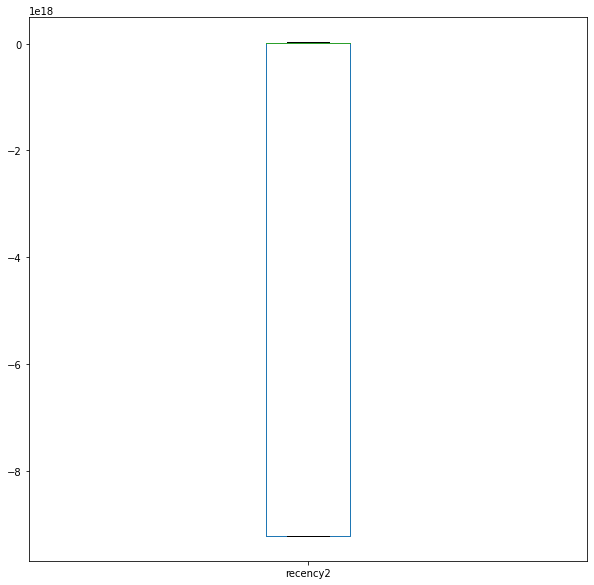

In [ ]:
df_copysort2.boxplot(column='recency2', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
# df_copysort2['recency2'] = pd.to_numeric(df_copysort2['recency2'], errors='coerce').fillna(0).astype('int64')
# df_copysort2

In [ ]:
# df_copysort2['recency'] = df_copysort['recency']
# df_copysort2

df_copysort3 = df_copysort.merge(df_copysort2,how='left',left_on='user_id', right_on='user_id',left_index=False, right_index=False)
df_copysort3

,user_id,date_x,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province,date_before_x,recency,recency2_x,date_y,date_before_y,recency2_y
0,10000,2018-01-01,1140582,2110379,3126808,198,10,games,Bogor,Jawa Barat,NaT,NaT,0 days,2018-12-22,2018-12-20,172800000000000
1,10000,2018-01-12,1226920,2291514,3297924,210,15,sports,Bekasi,Jawa Barat,2018-01-01,11 days,0 days,2018-12-22,2018-12-20,172800000000000
2,10000,2018-01-14,1189599,2133588,3179344,226,3,stationary,Jakarta Timur,DKI Jakarta,2018-01-12,2 days,0 days,2018-12-22,2018-12-20,172800000000000
3,10000,2018-01-18,1155524,2174128,3123869,207,25,sports,Semarang,Jawa Tengah,2018-01-14,4 days,0 days,2018-12-22,2018-12-20,172800000000000
4,10000,2018-01-24,1160216,2194313,3178554,112,22,electronics,Jakarta Barat,DKI Jakarta,2018-01-18,6 days,0 days,2018-12-22,2018-12-20,172800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,11494,2018-08-15,4115684,5142167,6106286,51,20,clothing,Jakarta Barat,DKI Jakarta,NaT,NaT,0 days,2018-08-15,NaT,-9223372036854775808
8973,11495,2018-02-22,4165724,5185038,6108128,63,13,groceries,Depok,Jawa Barat,NaT,NaT,0 days,2018-08-23,2018-02-22,15724800000000000
8974,11495,2018-08-23,4107896,5139681,6182806,31,15,groceries,Jakarta Utara,DKI Jakarta,2018-02-22,182 days,0 days,2018-08-23,2018-02-22,15724800000000000
8975,11497,2018-01-10,4140418,5114552,6171030,44,23,electronics,Jakarta Barat,DKI Jakarta,NaT,NaT,0 days,2018-01-10,NaT,-9223372036854775808


In [ ]:
df_copysort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8977 entries, 1998 to 8016
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   user_id                  8977 non-null   int64          
 1   date                     8977 non-null   datetime64[ns] 
 2   transaction_id           8977 non-null   int64          
 3   visit_id                 8977 non-null   int64          
 4   voucher_id               8977 non-null   int64          
 5   transaction_amount_in_k  8977 non-null   int64          
 6   voucher_amount_in_k      8977 non-null   int64          
 7   product_category         8977 non-null   object         
 8   city                     8977 non-null   object         
 9   province                 8977 non-null   object         
 10  date_before              7797 non-null   datetime64[ns] 
 11  recency                  7797 non-null   timedelta64[ns]
 12  recency2         

In [ ]:
df_copysort.to_csv('df_copysort2.csv', index=False )
! df_copysort.csv

/bin/bash: df_copysort.csv: command not found


In [ ]:
# df_copysort['recency'] = def diff_dates(date1, date2):
#     return abs(date2-date1).days

# def main():
#     d1 = df_copysort.
#     d2 = date(2013,9,13)
#     result1 = diff_dates(d2, d1)

In [ ]:
df_copysort.groupby(['user_id'])['date'].max()

user_id
10000   2018-12-22
10001   2018-12-26
10002   2018-12-24
10003   2018-12-16
10004   2018-12-25
           ...    
11492   2018-05-28
11494   2018-08-15
11495   2018-08-23
11497   2018-01-10
11499   2018-10-10
Name: date, Length: 1180, dtype: datetime64[ns]

In [ ]:
df_copysort.to_csv('df_copysort.csv', index=False )
! df_copysort.csv

/bin/bash: df_copysort.csv: command not found


In [ ]:
duplicateRowsDF = recency_copy[recency_copy.duplicated()]
duplicateRowsDF

,user_id,date,Recency


In [ ]:
# recency_copy['date_before'] = recency_copy.groupby(['user_id'])['date'].shift(1)
# recency_copy

In [ ]:
# recency_copy[].info()

In [ ]:
# recency_copy['user_id'].count(10000)

In [ ]:
frequency_df2 = df.groupby(
    by=['user_id'], as_index=False)['date'].count()
frequency_df2.columns = ['user_id', 'Frequency']
frequency_df2.head()

,user_id,Frequency
0,10000,55
1,10001,62
2,10002,65
3,10003,74
4,10004,69


In [ ]:
frequency_df2.describe()

,user_id,Frequency
count,1180.000000,1180.000000
mean,10673.597458,7.607627
std,437.802348,15.597659
min,10000.000000,1.000000
25%,10295.750000,1.000000
50%,10599.500000,3.000000
75%,11052.000000,6.000000
max,11499.000000,82.000000


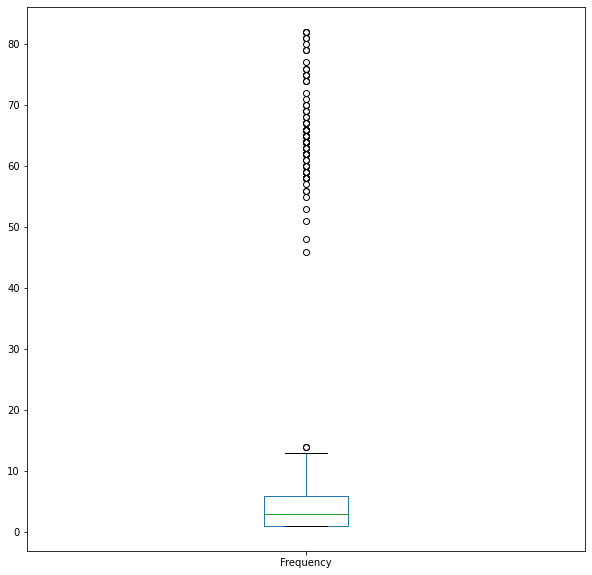

In [ ]:
frequency_df2.boxplot(column='Frequency', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
# Q1_f = frequency_df2[['Frequency']].quantile(0.25)
# Q3_f = frequency_df2[['Frequency']].quantile(0.75)

# IQR_f = Q3_f - Q1_f
# boxplot_min_f = Q1_f - 1.5 * IQR_f
# boxplot_max_f = Q3_f + 1.5 * IQR_f
# print('Q1:\n',Q1_f)
# print('\nQ3:\n',Q3_f)
# print('\nIQR:\n',IQR_f)
# print('\nMin:\n',boxplot_min_f)
# print('\nMax:\n',boxplot_max_f)

In [ ]:
df['Total'] = df['transaction_amount_in_k']
monetary_df2 = df.groupby(by='user_id', as_index=False)['Total'].sum()
monetary_df2.columns = ['user_id', 'Monetary']
monetary_df2

,user_id,Monetary
0,10000,9820
1,10001,10778
2,10002,11266
3,10003,12660
4,10004,11890
...,...,...
1175,11492,49
1176,11494,51
1177,11495,94
1178,11497,44


In [ ]:
monetary_df2.describe()

,user_id,Monetary
count,1180.000000,1180.000000
mean,10673.597458,1027.795763
std,437.802348,2776.948779
min,10000.000000,10.000000
25%,10295.750000,63.000000
50%,10599.500000,157.000000
75%,11052.000000,616.250000
max,11499.000000,14359.000000


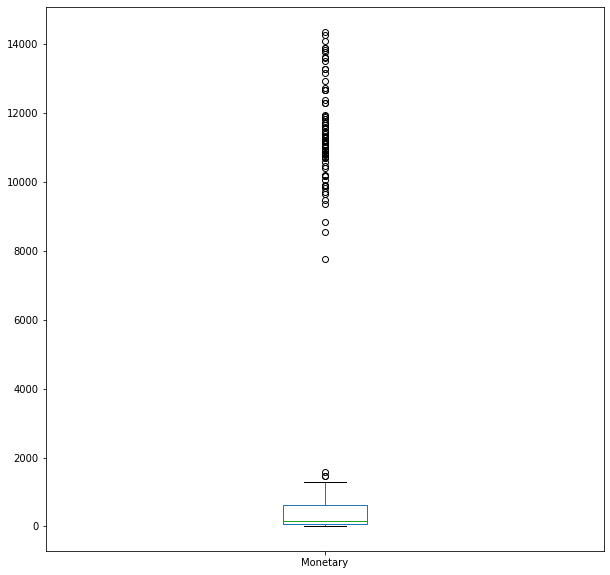

In [ ]:
monetary_df2.boxplot(column='Monetary', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
# Q1_m = monetary_df2[['Monetary']].quantile(0.25)
# Q3_m = monetary_df2[['Monetary']].quantile(0.75)

# IQR_m = Q3_m - Q1_m
# boxplot_min_m = Q1_m - 1.5 * IQR_m
# boxplot_max_m = Q3_m + 1.5 * IQR_m
# print('Q1:\n',IQR_m)
# print('\nQ3:\n',Q3_m)
# print('\nIQR:\n',IQR_m)
# print('\nMin:\n',boxplot_min_m)
# print('\nMax:\n',boxplot_max_m)

In [ ]:
# # Checking the distribution of Recency, Frequency and MonetaryValue variables.
# plt.figure(figsize=(12,10))
# # Plot distribution of var1
# plt.subplot(3, 1, 1); sns.distplot(df_copysort2['recency2'])
# # Plot distribution of var2
# plt.subplot(3, 1, 2); sns.distplot(frequency_df2['Frequency'])
# # Plot distribution of var3
# plt.subplot(3, 1, 3); sns.distplot(monetary_df2['Monetary'])

In [ ]:
#merge data step 1
rfm_df0 = df_copysort2.merge(frequency_df2,how='left',left_on='user_id', right_on='user_id')
rfm_df0

,user_id,date,date_before,recency2,Frequency
0,10000,2018-12-22,2018-12-20,172800000000000,55
1,10001,2018-12-26,2018-12-19,604800000000000,62
2,10002,2018-12-24,2018-12-23,86400000000000,65
3,10003,2018-12-16,2018-12-08,691200000000000,74
4,10004,2018-12-25,2018-12-24,86400000000000,69
...,...,...,...,...,...
1175,11492,2018-05-28,2018-04-24,2937600000000000,2
1176,11494,2018-08-15,NaT,-9223372036854775808,1
1177,11495,2018-08-23,2018-02-22,15724800000000000,2
1178,11497,2018-01-10,NaT,-9223372036854775808,1


In [ ]:
#merge data step 2
rfm_df = rfm_df0.merge(monetary_df2,how='left',left_on='user_id', right_on='user_id')
rfm_df

,user_id,date,date_before,recency2,Frequency,Monetary
0,10000,2018-12-22,2018-12-20,172800000000000,55,9820
1,10001,2018-12-26,2018-12-19,604800000000000,62,10778
2,10002,2018-12-24,2018-12-23,86400000000000,65,11266
3,10003,2018-12-16,2018-12-08,691200000000000,74,12660
4,10004,2018-12-25,2018-12-24,86400000000000,69,11890
...,...,...,...,...,...,...
1175,11492,2018-05-28,2018-04-24,2937600000000000,2,49
1176,11494,2018-08-15,NaT,-9223372036854775808,1,51
1177,11495,2018-08-23,2018-02-22,15724800000000000,2,94
1178,11497,2018-01-10,NaT,-9223372036854775808,1,44


In [ ]:
rfm_df.describe()

,user_id,recency2,Frequency,Monetary
count,1180.000000,1.180000e+03,1180.000000,1180.000000
mean,10673.597458,-2.520096e+18,7.607627,1027.795763
std,437.802348,4.117014e+18,15.597659,2776.948779
min,10000.000000,-9.223372e+18,1.000000,10.000000
25%,10295.750000,-9.223372e+18,1.000000,63.000000
50%,10599.500000,1.987200e+15,3.000000,157.000000
75%,11052.000000,7.084800e+15,6.000000,616.250000
max,11499.000000,3.110400e+16,82.000000,14359.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

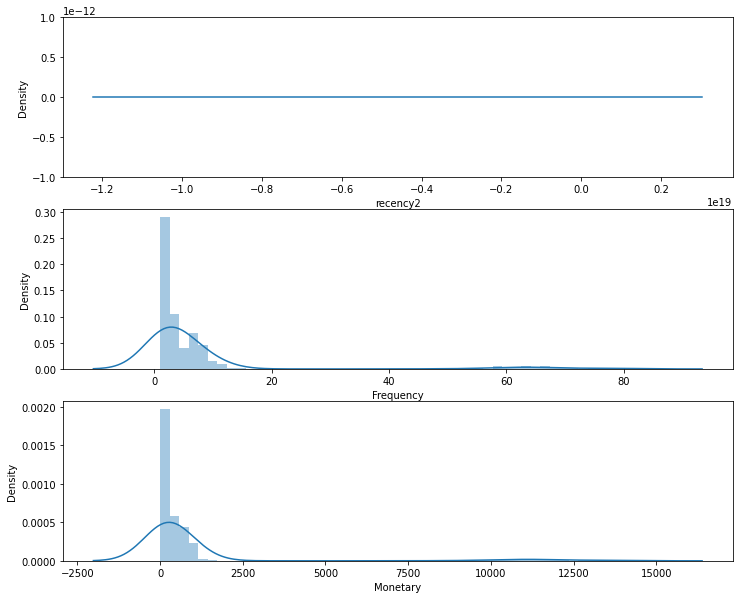

In [ ]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency2'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])

In [ ]:
# rfm_df2 = rfm_df.copy()
# rfm_df2 = rfm_df2[(rfm_df2['Frequency'] >= -6.5 ) & (rfm_df2['Frequency'] <= 13.5)]
# rfm_df2
# # len(df1)

In [ ]:
# rfm_df2 = rfm_df2[(rfm_df2['Monetary'] >= -766.875 ) & (rfm_df2['Monetary'] <= 1446.125)]
# rfm_df2

In [ ]:
rfm_df['R_rank'] = rfm_df['recency2'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [ ]:
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,date,date_before,recency2,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,10000,2018-12-22,2018-12-20,172800000000000,55,9820,80.520118,94.062765,93.983051
1,10001,2018-12-26,2018-12-19,604800000000000,62,10778,72.669284,95.801527,95.720339
2,10002,2018-12-24,2018-12-23,86400000000000,65,11266,82.433759,97.116200,97.033898
3,10003,2018-12-16,2018-12-08,691200000000000,74,12660,71.000981,98.854962,98.771186
4,10004,2018-12-25,2018-12-24,86400000000000,69,11890,82.433759,98.346056,98.262712


In [ ]:

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['user_id', 'RFM_Score']].head(7)

,user_id,RFM_Score
0,10000,4.60
1,10001,4.61
2,10002,4.74
3,10003,4.73
4,10004,4.80
5,10005,4.77
6,10006,4.59


In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Loyal Customers",
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,
							'Low Value Customers', 'Lost Customers'))))))
rfm_df[['user_id', 'RFM_Score', 'Customer_segment']].head(20)

,user_id,RFM_Score,Customer_segment
0,10000,4.60,Loyal Customers
1,10001,4.61,Loyal Customers
2,10002,4.74,Loyal Customers
3,10003,4.73,Loyal Customers
4,10004,4.80,Loyal Customers
5,10005,4.77,Loyal Customers
6,10006,4.59,Loyal Customers
7,10007,4.79,Loyal Customers
8,10008,4.61,Loyal Customers
9,10009,4.68,Loyal Customers


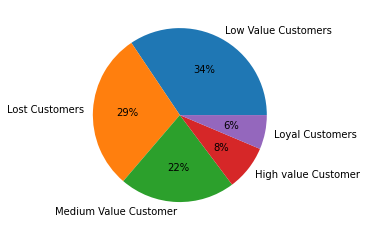

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
rfm_df

,user_id,date,date_before,recency2,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,10000,2018-12-22,2018-12-20,172800000000000,55,9820,80.52,94.06,93.98,4.60,Loyal Customers
1,10001,2018-12-26,2018-12-19,604800000000000,62,10778,72.67,95.80,95.72,4.61,Loyal Customers
2,10002,2018-12-24,2018-12-23,86400000000000,65,11266,82.43,97.12,97.03,4.74,Loyal Customers
3,10003,2018-12-16,2018-12-08,691200000000000,74,12660,71.00,98.85,98.77,4.73,Loyal Customers
4,10004,2018-12-25,2018-12-24,86400000000000,69,11890,82.43,98.35,98.26,4.80,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...
1175,11492,2018-05-28,2018-04-24,2937600000000000,2,49,50.98,37.32,37.29,1.97,Low Value Customers
1176,11494,2018-08-15,NaT,-9223372036854775808,1,51,100.00,13.74,13.73,1.33,Lost Customers
1177,11495,2018-08-23,2018-02-22,15724800000000000,2,94,8.64,37.32,37.29,1.65,Low Value Customers
1178,11497,2018-01-10,NaT,-9223372036854775808,1,44,100.00,13.74,13.73,1.33,Lost Customers


# **Clustering Mix RFM & voucher_amount_in_k**

## **Preparation**



In [ ]:
df_mix = df.merge(rfm_df,how='left',left_on='user_id', right_on='user_id')
df_mix

,user_id,date_x,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province,Total,date_y,date_before,recency2,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,10035,2018-05-24,1160628,2196007,3164879,240,1,electronics,Jakarta Selatan,DKI Jakarta,240,2018-12-27,2018-12-19,691200000000000,64,10726,71.00,96.65,96.57,4.64,Loyal Customers
1,10053,2018-07-22,1100650,2193080,3140309,232,10,games,Jakarta Selatan,DKI Jakarta,232,2018-12-26,2018-12-14,1036800000000000,64,11297,66.93,96.65,96.57,4.61,Loyal Customers
2,10032,2018-10-22,1118238,2142522,3151159,134,17,home and apartment,Jakarta Pusat,DKI Jakarta,134,2018-12-25,2018-12-19,518400000000000,70,12389,74.09,98.52,98.43,4.74,Loyal Customers
3,10069,2018-04-13,1182897,2155246,3172989,146,9,sports,Jakarta Selatan,DKI Jakarta,146,2018-12-18,2018-12-17,86400000000000,62,10801,82.43,95.80,95.72,4.69,Loyal Customers
4,10025,2018-05-02,1148545,2131938,3174162,105,16,clothing,Tangerang Selatan,Banten,105,2018-12-25,2018-12-24,86400000000000,63,11229,82.43,96.23,96.14,4.71,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,11019,2018-01-14,4157499,5130378,6114690,33,6,home and apartment,Jakarta Pusat,DKI Jakarta,33,2018-04-05,2018-01-14,6998400000000000,2,106,29.39,37.32,37.29,1.81,Low Value Customers
8973,10912,2018-12-01,4106230,5134521,6120370,38,27,sports,Jakarta Selatan,DKI Jakarta,38,2018-12-01,2018-05-03,18316800000000000,2,77,5.10,37.32,37.29,1.62,Low Value Customers
8974,10960,2018-10-16,4146922,5108166,6114767,55,21,sports,Surabaya,Jawa Timur,55,2018-10-16,NaT,-9223372036854775808,1,55,100.00,13.74,13.73,1.33,Lost Customers
8975,10619,2018-09-23,4187553,5104547,6102348,55,2,home and apartment,Surabaya,Jawa Timur,55,2018-09-23,NaT,-9223372036854775808,1,55,100.00,13.74,13.73,1.33,Lost Customers


In [ ]:
pd.isnull(df_mix).sum()

user_id                      0
date_x                       0
transaction_id               0
visit_id                     0
voucher_id                   0
transaction_amount_in_k      0
voucher_amount_in_k          0
product_category             0
city                         0
province                     0
Total                        0
date_y                       0
date_before                323
recency2                     0
Frequency                    0
Monetary                     0
R_rank_norm                  0
F_rank_norm                  0
M_rank_norm                  0
RFM_Score                    0
Customer_segment             0
dtype: int64

In [ ]:
df_mix = df_mix.dropna(how='any',axis=0) 
df_mix

,user_id,date_x,transaction_id,visit_id,voucher_id,transaction_amount_in_k,voucher_amount_in_k,product_category,city,province,Total,date_y,date_before,recency2,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,10035,2018-05-24,1160628,2196007,3164879,240,1,electronics,Jakarta Selatan,DKI Jakarta,240,2018-12-27,2018-12-19,691200000000000,64,10726,71.00,96.65,96.57,4.64,Loyal Customers
1,10053,2018-07-22,1100650,2193080,3140309,232,10,games,Jakarta Selatan,DKI Jakarta,232,2018-12-26,2018-12-14,1036800000000000,64,11297,66.93,96.65,96.57,4.61,Loyal Customers
2,10032,2018-10-22,1118238,2142522,3151159,134,17,home and apartment,Jakarta Pusat,DKI Jakarta,134,2018-12-25,2018-12-19,518400000000000,70,12389,74.09,98.52,98.43,4.74,Loyal Customers
3,10069,2018-04-13,1182897,2155246,3172989,146,9,sports,Jakarta Selatan,DKI Jakarta,146,2018-12-18,2018-12-17,86400000000000,62,10801,82.43,95.80,95.72,4.69,Loyal Customers
4,10025,2018-05-02,1148545,2131938,3174162,105,16,clothing,Tangerang Selatan,Banten,105,2018-12-25,2018-12-24,86400000000000,63,11229,82.43,96.23,96.14,4.71,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,10755,2018-10-14,4136339,5141706,6136314,20,23,electronics,Tangerang Selatan,Banten,20,2018-10-16,2018-10-14,172800000000000,3,85,80.52,52.29,52.25,2.82,Low Value Customers
8970,10977,2018-10-14,4186870,5114199,6111170,25,13,electronics,Semarang,Jawa Tengah,25,2018-10-14,2018-08-02,6307200000000000,3,135,31.94,52.29,52.25,2.46,Low Value Customers
8971,11482,2018-10-16,4156169,5161722,6169344,17,27,stationary,Jakarta Timur,DKI Jakarta,17,2018-10-16,2018-09-11,3024000000000000,3,134,50.39,52.29,52.25,2.60,Low Value Customers
8972,11019,2018-01-14,4157499,5130378,6114690,33,6,home and apartment,Jakarta Pusat,DKI Jakarta,33,2018-04-05,2018-01-14,6998400000000000,2,106,29.39,37.32,37.29,1.81,Low Value Customers


In [ ]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 8973
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  8654 non-null   int64         
 1   date_x                   8654 non-null   datetime64[ns]
 2   transaction_id           8654 non-null   int64         
 3   visit_id                 8654 non-null   int64         
 4   voucher_id               8654 non-null   int64         
 5   transaction_amount_in_k  8654 non-null   int64         
 6   voucher_amount_in_k      8654 non-null   int64         
 7   product_category         8654 non-null   object        
 8   city                     8654 non-null   object        
 9   province                 8654 non-null   object        
 10  Total                    8654 non-null   int64         
 11  date_y                   8654 non-null   datetime64[ns]
 12  date_before              8654 non-

## **Clustering Mix RFM & voucher_amount_in_k**

In [ ]:
# personalise = ['voucher_amount_in_k','Recency','Frequency','Monetary']

In [ ]:
## Define the numeric column
df_mix_cluster = df_mix[['voucher_amount_in_k','recency2','Frequency','Monetary']]

<Figure size 1152x576 with 0 Axes>

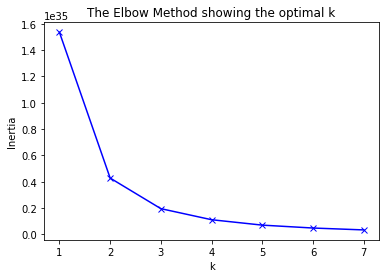

In [ ]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_mix_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_mix_cluster)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_mix_cluster, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.7984996280822386
For n_clusters=3, The Silhouette Coefficient is 0.7648143138671137
For n_clusters=4, The Silhouette Coefficient is 0.7437308428908177
For n_clusters=5, The Silhouette Coefficient is 0.7331741816940948
For n_clusters=6, The Silhouette Coefficient is 0.7149149849838121
For n_clusters=7, The Silhouette Coefficient is 0.6963556725198599


For n_clusters = 2 The average silhouette_score is : 0.7984996280822386
For n_clusters = 3 The average silhouette_score is : 0.7648143138671137
For n_clusters = 4 The average silhouette_score is : 0.7437308428908177
For n_clusters = 5 The average silhouette_score is : 0.7331084451429957


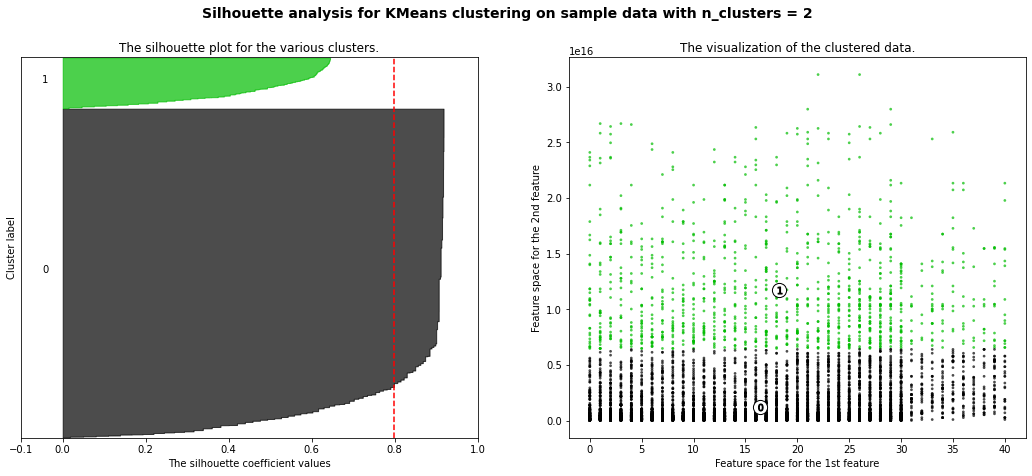

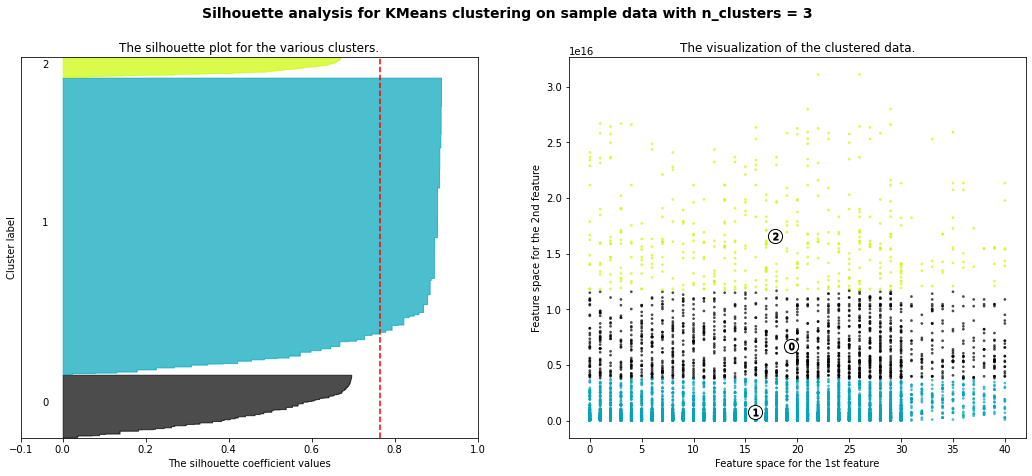

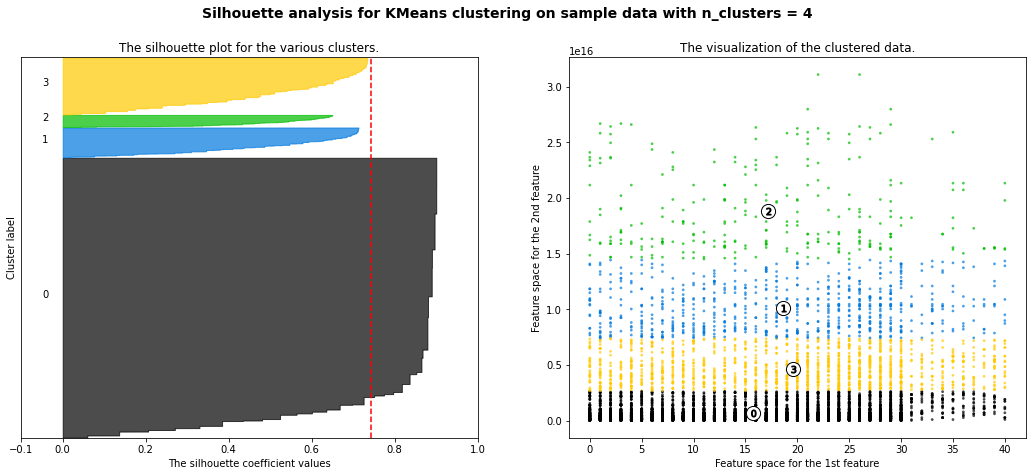

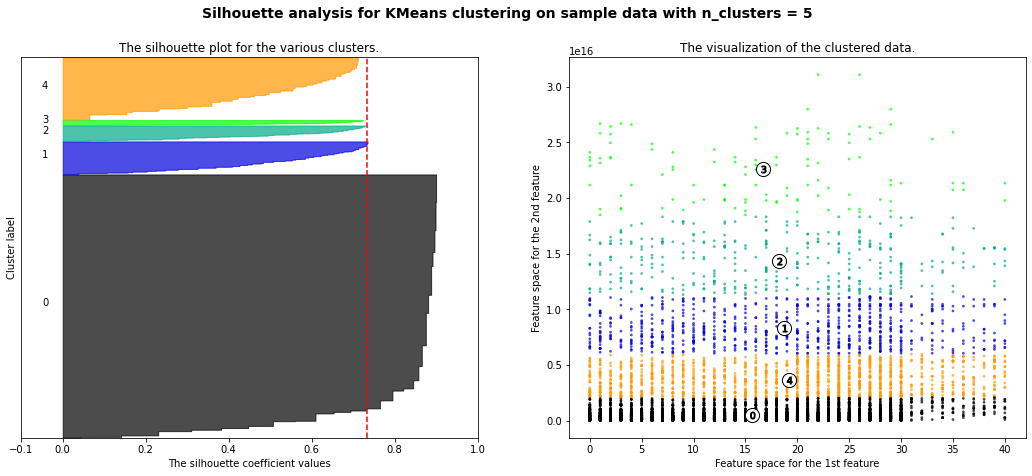

In [ ]:
from silhoutte import silhoutte_analysis
silhoutte_analysis(df_mix_cluster,[2, 3, 4, 5])

In [ ]:
from sklearn.cluster import KMeans
cluster_model = cluster.KMeans(n_clusters=3)
cluster_array = cluster_model.fit(df_mix_cluster)
cluster_label = cluster_model.labels_
df_mix['cluster'] = cluster_label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_mix['cluster'].value_counts()

1    6778
0    1432
2     444
Name: cluster, dtype: int64

In [ ]:
## Find Descriptive Statistic for Each Clustering & Columns
df_mix.groupby('cluster')[['voucher_amount_in_k','recency2','Frequency','Monetary',]].agg(['median'])

,voucher_amount_in_k,recency2,Frequency,Monetary
,median,median,median,median
cluster,,,,
0,21.0,6.393600e+15,6.0,606.0
1,16.0,4.320000e+14,62.0,10928.0
2,18.0,1.563840e+16,3.0,167.0


In [ ]:
df_mix.groupby('cluster')[['voucher_amount_in_k','recency2','Frequency','Monetary',]].agg(['mean'])

,voucher_amount_in_k,recency2,Frequency,Monetary
,mean,mean,mean,mean
cluster,,,,
0,19.376397,6.718626e+15,5.949721,571.740922
1,15.948952,7.788110e+14,50.871939,8733.308203
2,17.804054,1.662675e+16,3.324324,262.581081


**INTERPRETATION**

1 -> High Value Customers

Characteristics: Customers who quite often use vouchers and make transactions. Spending less money than the Loyal Customers.

.

0 -> Low Value Customers (PROMO HUNTERS DETECTED!)

Characteristics: Customers who use vouchers the most, but haven't used our platform for a long time, make the fewest transactions, and spending the least money.

.

2 -> Loyal Customers (They love to engage with us!)

Characteristics: 
Customers who use the fewest vouchers, but they use our service very often and spending a lot of money.


In [ ]:
df_mix.to_csv ('cluster.csv', index = False, header=True)